<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten,Bidirectional,LSTM
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
#from google.colab import drive
#drive.mount('/content/drive/')
#data = '/content/drive/My Drive/Colab Notebooks/data/Sarcasm_Headlines_Dataset.json'

### Load Data (5 Marks)

In [6]:
df=pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


### Drop `article_link` from dataset (5 Marks)

In [8]:
df_new = df.drop("article_link",axis=1)

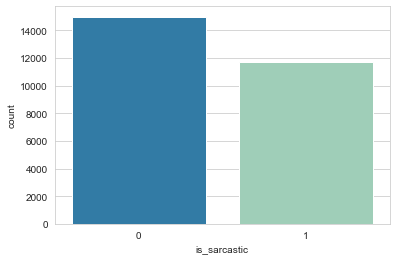

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='is_sarcastic',data=df_new, palette='YlGnBu_r')

### Get length of each headline and add a column for that (5 Marks)

In [10]:
df_new["headline_lenght"]=sys.getsizeof(df_new["headline"])

In [11]:
df_new.head(10)

,headline,is_sarcastic,headline_lenght
0,former versace store clerk sues over secret 'b...,0,3159534
1,the 'roseanne' revival catches up to our thorn...,0,3159534
2,mom starting to fear son's web series closest ...,1,3159534
3,"boehner just wants wife to listen, not come up...",1,3159534
4,j.k. rowling wishes snape happy birthday in th...,0,3159534
5,advancing the world's women,0,3159534
6,the fascinating case for eating lab-grown meat,0,3159534
7,"this ceo will send your kids to school, if you...",0,3159534
8,top snake handler leaves sinking huckabee camp...,1,3159534
9,friday's morning email: inside trump's presser...,0,3159534


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [12]:
max_features = 10000
maxlen = 25
embedding_size = 200

In [13]:
from sklearn.model_selection import train_test_split
X=df_new['headline']
y=df_new['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Apply `tensorflow.keras` Tokenizer and get indices for words (5 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [14]:
vocab_size=max_features
embedding_dim=embedding_size
max_length=maxlen
trunc_type='post'
padding_type='post'
oov_tok='<oov>'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index=tokenizer.word_index

training_sequences=tokenizer.texts_to_sequences(X_train)
testing_sequences=tokenizer.texts_to_sequences(X_test)


### Pad sequences (5 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [15]:
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Vocab mapping
- There is no word for 0th index

In [16]:
tokenizer.word_index

{'<oov>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'from': 15,
 'at': 16,
 'about': 17,
 'you': 18,
 'this': 19,
 'by': 20,
 'up': 21,
 'be': 22,
 'after': 23,
 'out': 24,
 'how': 25,
 'it': 26,
 'that': 27,
 'as': 28,
 'not': 29,
 'your': 30,
 'are': 31,
 'his': 32,
 'what': 33,
 'he': 34,
 'has': 35,
 'just': 36,
 'will': 37,
 'all': 38,
 'who': 39,
 'one': 40,
 'more': 41,
 'into': 42,
 'why': 43,
 'donald': 44,
 'report': 45,
 'area': 46,
 'year': 47,
 'have': 48,
 'over': 49,
 'can': 50,
 'u': 51,
 's': 52,
 'day': 53,
 'says': 54,
 'woman': 55,
 'first': 56,
 'her': 57,
 'time': 58,
 "trump's": 59,
 'an': 60,
 'off': 61,
 'no': 62,
 'like': 63,
 'old': 64,
 'obama': 65,
 'get': 66,
 'life': 67,
 'now': 68,
 'people': 69,
 'make': 70,
 "'": 71,
 'was': 72,
 'than': 73,
 'if': 74,
 'still': 75,
 'i': 76,
 'house': 77,
 'down': 78,
 'when': 79,
 'my': 80,
 'back': 81,
 'women':

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [17]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

24786


### Load Glove Word Embeddings (5 Marks)

In [18]:
import string
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r',encoding='utf-8')
	lines = file.readlines()
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
	return embedding

In [19]:
raw_embedding = load_embedding('glove.6B.100d.txt')

### Create embedding matrix

In [20]:
EMBEDDING_FILE = './glove.6B.200d.txt'
embeddings = {}
glove_file = 'glove.6B.200d'

for o in open(EMBEDDING_FILE,'r',encoding='utf-8'):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, embedding_size))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [21]:
embedding_matrix.shape
vocab_size = num_words

In [22]:
# create the embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Define model (10 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [23]:
model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(max_length, 1)))
model.add(Flatten())
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compile the model (5 Marks)

In [24]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           4957200   
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 128)           135680    
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                102432    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
____________________________

### Fit the model (5 Marks)

In [25]:
print(training_padded.shape)
print(X_train.shape)
print(y_train.shape)
print(testing_padded.shape)
print(X_test.shape)
print(y_test.shape)

(18696, 25)
(18696,)
(18696,)
(8013, 25)
(8013,)
(8013,)


In [58]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=training_padded, y=y_train, batch_size=1024, epochs=100, validation_data=(testing_padded, y_test), verbose=1, callbacks=[early_stop])

Train on 18696 samples, validate on 8013 samples
Epoch 1/100
18696/18696 [==============================] - 19s 996us/sample - loss: 0.2231 - acc: 0.9129 - val_loss: 0.3827 - val_acc: 0.8596
Epoch 2/100
18696/18696 [==============================] - 16s 862us/sample - loss: 0.2012 - acc: 0.9247 - val_loss: 0.3866 - val_acc: 0.8572
Epoch 3/100
18696/18696 [==============================] - 17s 885us/sample - loss: 0.1933 - acc: 0.9283 - val_loss: 0.3976 - val_acc: 0.8569
Epoch 4/100
18696/18696 [==============================] - 17s 889us/sample - loss: 0.1897 - acc: 0.9299 - val_loss: 0.4070 - val_acc: 0.8570
Epoch 5/100
18696/18696 [==============================] - 17s 899us/sample - loss: 0.1844 - acc: 0.9341 - val_loss: 0.4103 - val_acc: 0.8579
Epoch 6/100
18696/18696 [==============================] - 17s 908us/sample - loss: 0.1851 - acc: 0.9320 - val_loss: 0.4133 - val_acc: 0.8579
Epoch 00006: early stopping


In [59]:
df_m=pd.DataFrame(model.history.history)
df_m['Epoch']=range(1,7)
df_m.index=df_m['Epoch']
df_m

,loss,acc,val_loss,val_acc,Epoch
Epoch,,,,,
1,0.223144,0.912869,0.382717,0.859603,1
2,0.201238,0.924690,0.386566,0.857232,2
3,0.193298,0.928273,0.397578,0.856858,3
4,0.189671,0.929932,0.406967,0.856982,4
5,0.184436,0.934104,0.410338,0.857856,5
6,0.185104,0.931964,0.413320,0.857856,6


8013/8013 [==============================] - 5s 625us/sample - loss: 0.4133 - acc: 0.8579
Test accuracy: 0.857856


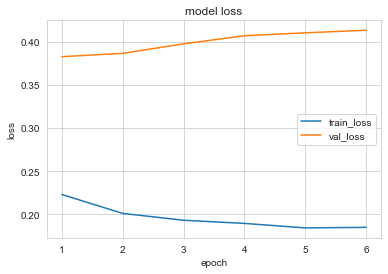

In [60]:
score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
print('Test accuracy:', score[1])

#Loss Graph(Training and Validation)
plt.plot(df_m['loss'])
plt.plot(df_m['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

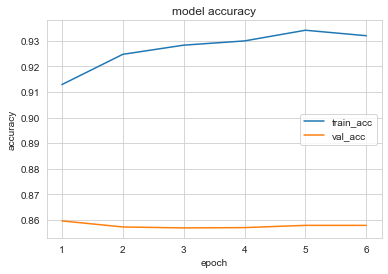

In [61]:
# Accuracy Graph(Training and Validation) 
plt.plot(df_m['acc'])
plt.plot(df_m['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [62]:
rounded_predictions = model.predict_classes(testing_padded)

In [63]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [64]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [65]:
cm_plot_labels = ['None_Sarcastic','Sarcastic']

Confusion matrix, without normalization
[[3854  590]
 [ 549 3020]]


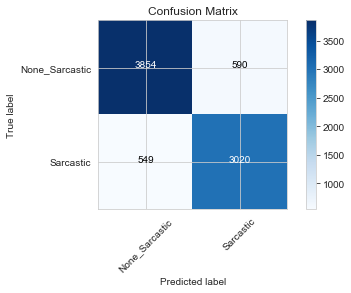

In [66]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Verifying model for sample Sentance

In [67]:
twt = ['keep up the good work']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=25, dtype='int32', value=0)

sarcastic_yes_no = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sarcastic_yes_no) == 0):
    print("Not Sarcastic")
elif (np.argmax(sarcastic_yes_no) == 1):
    print("Sarcastic")

1/1 - 0s
Not Sarcastic


# Conclusion:
* Sarcasm is the use of language that normally signifies the opposite in order to mock or convey contempt.
* Data: from Drive read it into local Dataframe
* Features: Done Feature extraction
* Models: Applied Bidirectional LSTM model and derived accuarcy
* Analysis: Done analysis on evaluation of test data with number of epochs.
* There is less number of sarcatic sentences as it is professional new data for hoffingtonpost  rather orion which is fake news site 
* Epoch and batch size has positive effect on model with less loss and more accuracy 
* Sarcasam detection of sentence with LSTM is 85% for test data 
* Verified for sample sentence.
